In [185]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from htmresearch.support.autoencoder.lateral_k_sparse_autoencoder import LateralKSparseAutoencoder

params = {
    "num_inputs": 200,
    "num_outputs": 50,
    "code_weight": 4,
    "learning_rate": 0.1,
    "beta": 0.001,
    "enforce_binary_output": True,
    "enable_boosting"      : False,
    "enforce_code_weight"  : False,
    "with_lateral"         : True
}



sp = LateralKSparseAutoencoder(**params)
print sp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

**Lateral k-sparse autoencoder:**
------------------
Number of inputs (m):	 200
Number of outputs (n):	 50
Code weight (k):	 4
Sparsity (k/n):		 0.08
Beta:			 0.001
Learning rate:		 0.1
Min/Max weights :	 -3.50  |  +3.91
Binary outupt:		 True
Boosting:		 False
Lateral:		 True
Enforce code weight:	 False
------------------


(100000, 200) (25, 200)


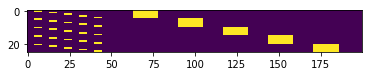

In [186]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from htmresearch.support.lateral_pooler.datasets import load_data

X, Y, X_test, Y_test = load_data("xy_biased")

X = X.T
X_test = X_test.T
Y = Y.T
Y_test = Y_test.T


print X.shape, X_test.shape

X_train = X


plt.imshow(X_test)

0


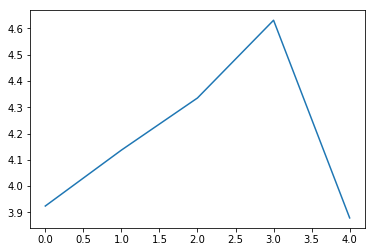

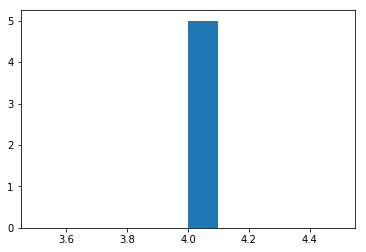

In [187]:

d = 5
for i in range(1):
    print i
    perm = np.random.permutation(len(X_train))
    Y, E, Loss = sp.fit(X_train[perm][:d])

plt.plot(Loss)
plt.show()

# Y_ = sp.encode( X_train[perm][:d], with_boosting=False, with_lateral=False, enforce_binary_output=True)
plt.hist(np.sum(Y, axis=1));


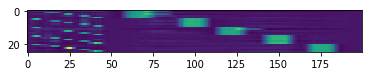

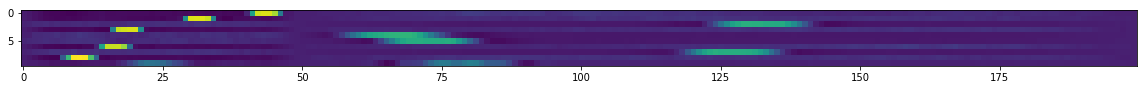

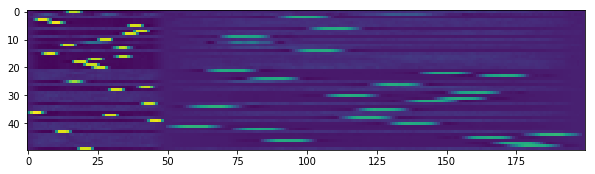

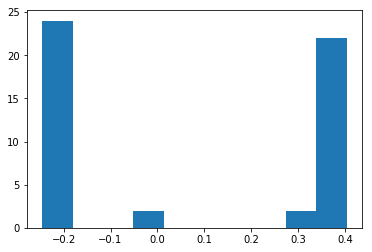

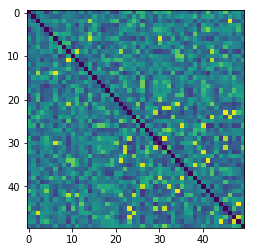

In [164]:
from scipy.special import expit as sigmoid

def normalize(x):
    x = x - np.amin(x)
    x = x/np.amax(x)
    return x

W = sp.weights

Y_test = sp.encode(X_test, with_boosting=True, with_lateral=True, enforce_binary_output=False)

k = sp.code_weight
plt.imshow(np.dot(Y_test[:100],W))
plt.show()

plt.figure(figsize=(20,10))
samples = np.random.choice(sp.num_outputs, size=10, replace=False)
plt.imshow(W[samples])
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(W)
plt.show()


plt.hist(np.amax(W[:,:50], axis=1) - np.amax(W[:,50:], axis=1)  )
plt.show()

plt.imshow(sp.lateral_connections)

## 

In [65]:


per = np.random.permutation(len(X_test))
print sp


**Lateral k-sparse autoencoder:**
------------------
Number of inputs (m):	 784
Number of outputs (n):	 100
Code weight (k):	 5
Sparsity (k/n):		 0.05
Beta:			 0.001
Learning rate:		 0.1
Min/Max weights :	 -0.52  |  +0.56
Binary outupt:		 True
Boosting:		 True
Lateral:		 True
Enforce code weight:	 True
------------------


4564.8267453
1428.28328794


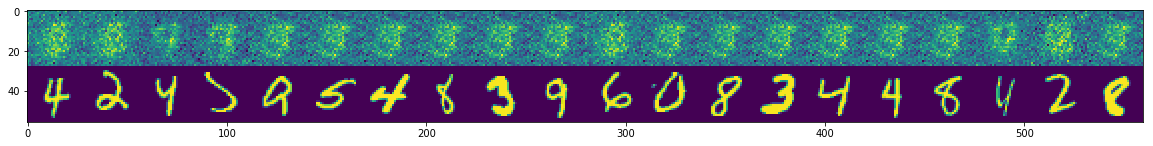

In [66]:

T = 10000
Y_test  = sp.encode(X_test[per][:T], with_boosting=True, with_lateral=True, enforce_binary_output=False)


X_hat  =  np.dot(Y_test, sp.weights)



print np.sum((X_hat[:T] - X_test[per][:T])**2)/T
print np.sum(np.abs(X_hat[:T] - X_test[per][:T]))/T



img_matrix = []
for i in range(20):
    x = normalize(X_test[per][i])
    x_hat = normalize(X_hat[i])

    
    img_matrix.append([ x_hat.reshape((28,28)).T, x.reshape((28,28)).T])

img = np.concatenate([ np.concatenate(row, axis=1) for row in img_matrix], axis=0)

plt.figure(figsize=(20,10))
plt.imshow(img.T)

(140, 560)


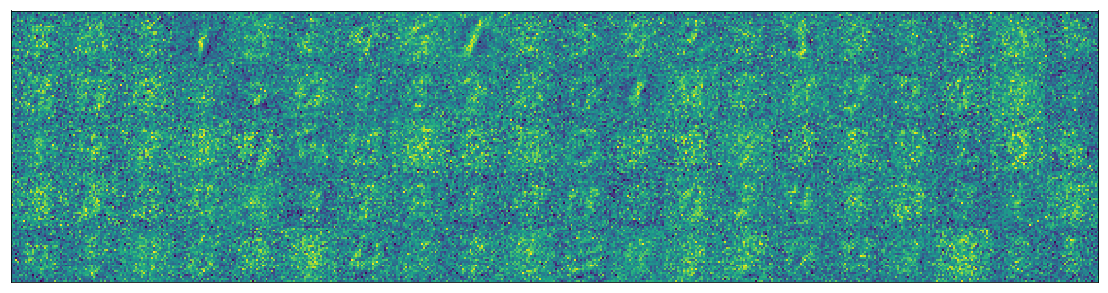

In [67]:
w = 20
h = 5
num_samples = w*h
n = sp.num_outputs
sample_units = np.random.choice(n, size=num_samples, replace=False) 




W = sp.weights

img_matrix = []
for y in range(h):
    img_matrix.append([])
    for x in range(w):
        i = sample_units[y*w + x]
        img = W[i].reshape(28,28)
        img = normalize(img)
        img_matrix[-1].append(img)



img = np.concatenate([ np.concatenate(row, axis=1) for row in img_matrix], axis=0)

plt.figure(figsize=(20,5))
print img.shape
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.savefig("non-boosted_feature_sample.pdf")